In [1]:
import glob
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from util import snana
from util.txtobj import txtobj

Text(0.5, 1.0, 'SNID = 630, $x_0$ = 2.07511e-05, $x_1$ = 2.01, c = 0.070')

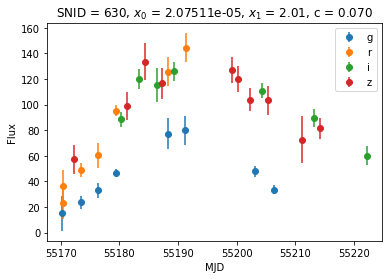

In [2]:
fr = txtobj('fitting/PS1MD.FITRES.TEXT',fitresheader=True)

lcfiles = glob.glob(os.path.expandvars('$SNDATA_ROOT/SIM/PS1MD/*DAT'))
sn = snana.SuperNova(lcfiles[10])
for f in sn.FILTERS:
    plt.errorbar(sn.MJD[sn.FLT == f],sn.FLUXCAL[sn.FLT == f],
                 yerr=sn.FLUXCALERR[sn.FLT == f],label=f,fmt='o')
plt.ylabel('Flux')
plt.xlabel('MJD')
plt.legend()

iSN = fr.CID == sn.SNID
plt.title('SNID = %s, $x_0$ = %8.5e, $x_1$ = %.2f, c = %.3f'%(
          sn.SNID,fr.x0[iSN],fr.x1[iSN],fr.c[iSN]))

g
r
i
z
y


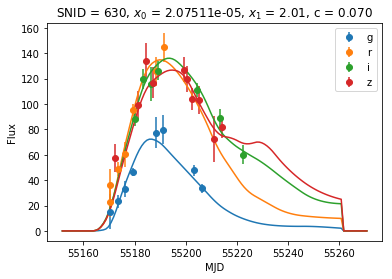

In [6]:
import sncosmo
from util import register
   
for f in sn.FILTERS:
    plt.errorbar(sn.MJD[sn.FLT == f],sn.FLUXCAL[sn.FLT == f],
                 yerr=sn.FLUXCALERR[sn.FLT == f],label=f,fmt='o')
plt.ylabel('Flux')
plt.xlabel('MJD')
plt.legend()

iSN = fr.CID == sn.SNID
plt.title('SNID = %s, $x_0$ = %8.5e, $x_1$ = %.2f, c = %.3f'%(
          sn.SNID,fr.x0[iSN],fr.x1[iSN],fr.c[iSN]))
    
dust = sncosmo.F99Dust()
dust.set(ebv=float(sn.MWEBV.split()[0])) # pretty ugly but whatever

model = sncosmo.Model(source='salt2',effects=[dust],effect_names=['mwebv'],effect_frames=['obs'])
# NOTE - SNANA SALT2 implementation has a 0.27 mag offset from sncosmo.
# this doesn't matter at all for most things like cosmology analyses,
# but certainly matters for making plots
model.set(z=fr.zHEL[iSN],t0=fr.PKMJD[iSN],
          x1=fr.x1[iSN],c=fr.c[iSN],x0=fr.x0[iSN]*10**(-0.4*(0.27)))

# register the filters to sncosmo using the kcor file.  sncosmo has
# pre-canned filter sets but it's best to be safe in a game where mmag
# offsets matter
mjd = np.arange(fr.PKMJD[iSN]-40,fr.PKMJD[iSN]+80,1)
register.from_kcor('kcor/kcor_PS1.fits')
for i,f in enumerate(sn.FILTERS):
    salt2flux = model.bandflux(f, mjd, zp=27.5, zpsys='AB')
    plt.plot(mjd,salt2flux,color='C%i'%i)
